# Load Meta Data

In [9]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geopandas as gpd 
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv("data/train_data/metadata.csv")
df

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,images/plume/20230103_methane_mixing_ratio_id_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,images/plume/20230301_methane_mixing_ratio_id_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,images/plume/20230225_methane_mixing_ratio_id_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,images/plume/20230105_methane_mixing_ratio_id_...
...,...,...,...,...,...,...,...,...,...
425,20230302,id_6658,no,train,30.965619,34.541283,39,36,images/no_plume/20230302_methane_mixing_ratio_...
426,20230218,id_4690,no,train,35.950275,40.267652,29,28,images/no_plume/20230218_methane_mixing_ratio_...
427,20230213,id_2519,no,train,49.963801,6.016938,23,10,images/no_plume/20230213_methane_mixing_ratio_...
428,20230213,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230213_methane_mixing_ratio_...


In [11]:
df["date"] = pd.to_datetime(df["date"].apply(str))

In [12]:
df["id_coord"].value_counts()

id_6707    21
id_5510    19
id_3773    18
id_2274    17
id_4574    15
           ..
id_8815     1
id_3201     1
id_7352     1
id_4187     1
id_2519     1
Name: id_coord, Length: 101, dtype: int64

In [13]:
df[df["id_coord"] == "id_5510"].date.sort_values()

356   2023-01-01
302   2023-01-10
277   2023-01-13
254   2023-01-17
397   2023-01-19
252   2023-01-20
339   2023-01-21
280   2023-01-23
272   2023-01-24
310   2023-02-01
428   2023-02-13
348   2023-02-18
233   2023-02-19
346   2023-03-17
290   2023-03-19
257   2023-03-29
266   2023-04-02
328   2023-04-03
285   2023-04-05
Name: date, dtype: datetime64[ns]

/var/folders/3x/b7p1txv95nl6qm0pnzz_d2ch0000gn/T/ipykernel_87972/2494601500.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


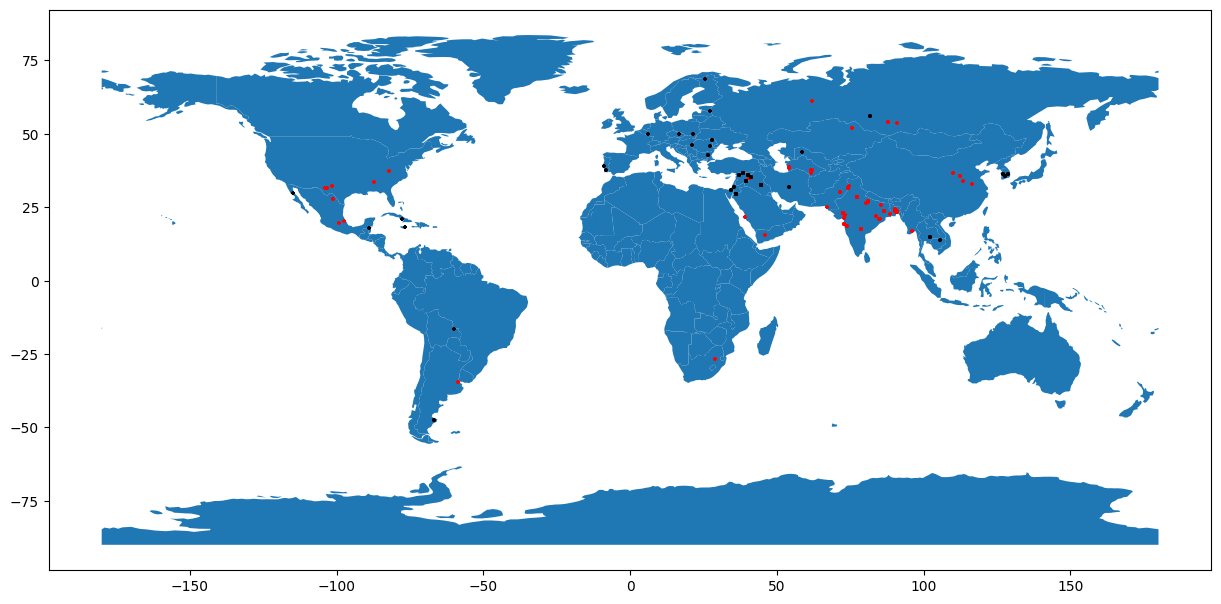

In [14]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame (df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
ax = world.plot(figsize=(15, 15))

# Overlay the points where plume is "yes" in red
gdf[gdf.plume == "yes"].plot(ax=ax, marker='+', color='red', markersize=10)

# Overlay the points where plume is "no" in black
gdf[gdf.plume == "no"].plot(ax=ax, marker='+', color='black', markersize=10)

# Show the plot
plt.show()

In [15]:
df_test = pd.read_csv("data/test_data/metadata.csv")
df_test["date"] = pd.to_datetime(df["date"].apply(str))
df_test

,date,id_coord,lat,lon,coord_x,coord_y
0,2023-02-23,id_6148,23.437500,90.645000,54,10
1,2023-01-03,id_3348,33.513333,-87.203333,31,55
2,2023-03-01,id_3733,26.424286,80.284286,33,44
3,2023-02-25,id_5491,30.246667,71.483333,59,59
4,2023-01-05,id_4287,23.763333,86.396667,46,46
...,...,...,...,...,...,...
104,2023-03-13,id_5510,32.713854,44.609398,55,54
105,2023-03-07,id_5510,32.713854,44.609398,55,54
106,2023-01-10,id_4690,35.950275,40.267652,29,28
107,2023-01-20,id_5510,32.713854,44.609398,55,54


In [7]:
geometry = [Point(xy) for xy in zip(df_test['lon'], df_test['lat'])]
gdf = GeoDataFrame (df_test, geometry=geometry)

/var/folders/3x/b7p1txv95nl6qm0pnzz_d2ch0000gn/T/ipykernel_87972/491059980.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


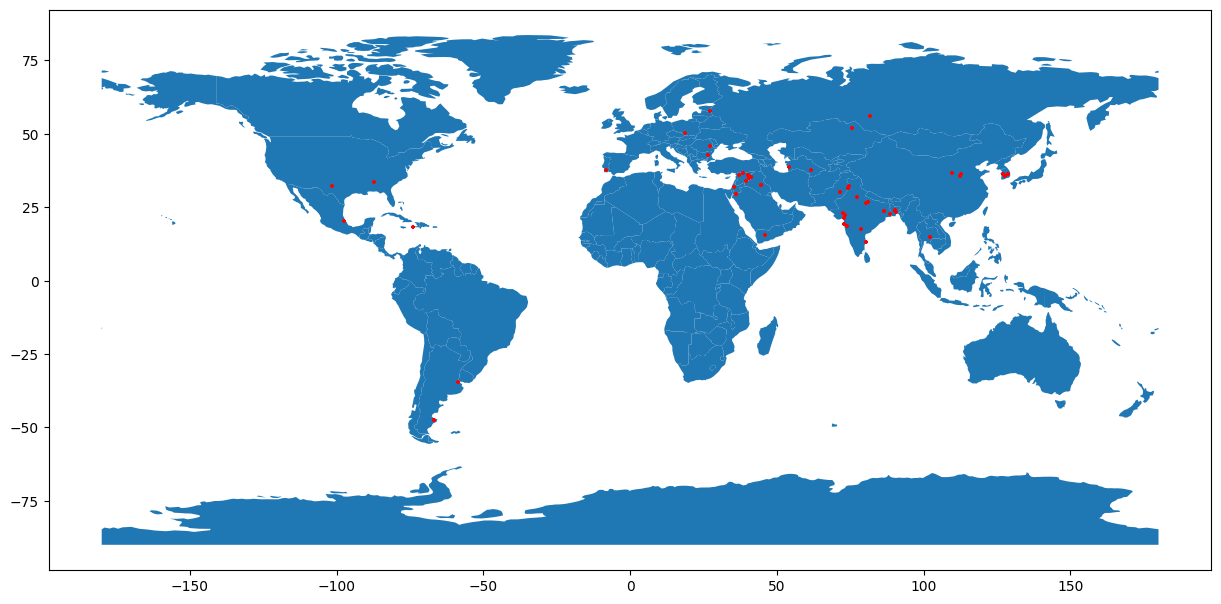

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 15))
gdf.plot(ax=ax, marker='+', color='red', markersize=10)
plt.show()

# Check the locations that have the same ID in training and testing data

In [99]:
df_test["id_coord"].isin(df["id_coord"]).value_counts()

True     101
False      8
Name: id_coord, dtype: int64

In [119]:
test_same_id = df_test[df_test["id_coord"].isin(df["id_coord"])]
test_same_id

,date,id_coord,lat,lon,coord_x,coord_y
0,2023-02-23,id_6148,23.437500,90.645000,54,10
1,2023-01-03,id_3348,33.513333,-87.203333,31,55
2,2023-03-01,id_3733,26.424286,80.284286,33,44
3,2023-02-25,id_5491,30.246667,71.483333,59,59
4,2023-01-05,id_4287,23.763333,86.396667,46,46
...,...,...,...,...,...,...
104,2023-03-13,id_5510,32.713854,44.609398,55,54
105,2023-03-07,id_5510,32.713854,44.609398,55,54
106,2023-01-10,id_4690,35.950275,40.267652,29,28
107,2023-01-20,id_5510,32.713854,44.609398,55,54


In [121]:
test_same_id[test_same_id["id_coord"]=="id_5510"]

,date,id_coord,lat,lon,coord_x,coord_y
69,2023-02-02,id_5510,32.713854,44.609398,55,54
71,2023-03-07,id_5510,32.713854,44.609398,55,54
84,2023-03-15,id_5510,32.713854,44.609398,55,54
104,2023-03-13,id_5510,32.713854,44.609398,55,54
105,2023-03-07,id_5510,32.713854,44.609398,55,54
107,2023-01-20,id_5510,32.713854,44.609398,55,54


In [122]:
df[df["id_coord"]=="id_5510"]

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
233,2023-02-19,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230219_methane_mixing_ratio_...
252,2023-01-20,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230120_methane_mixing_ratio_...
254,2023-01-17,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230117_methane_mixing_ratio_...
257,2023-03-29,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230329_methane_mixing_ratio_...
266,2023-04-02,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230402_methane_mixing_ratio_...
272,2023-01-24,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230124_methane_mixing_ratio_...
277,2023-01-13,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230113_methane_mixing_ratio_...
280,2023-01-23,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230123_methane_mixing_ratio_...
285,2023-04-05,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230405_methane_mixing_ratio_...
290,2023-03-19,id_5510,no,train,32.713854,44.609398,55,54,images/no_plume/20230319_methane_mixing_ratio_...


<Axes: xlabel='lon', ylabel='lat'>

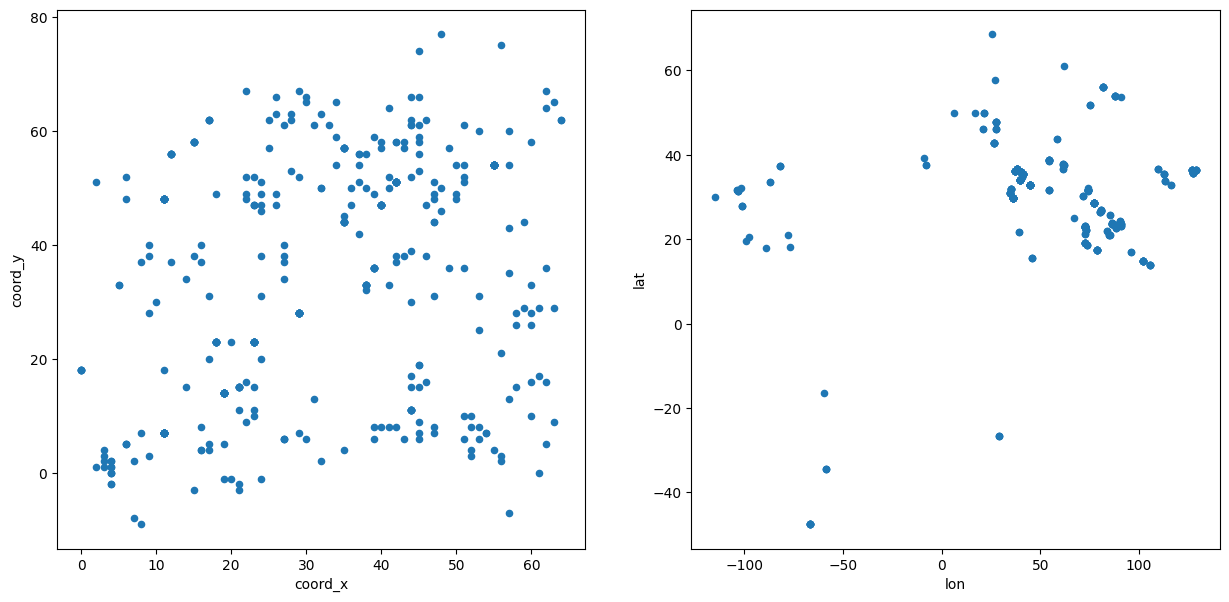

In [23]:
fig, ax=plt.subplots(ncols=2, figsize=(15,7))
df.plot(kind="scatter", x="coord_x", y="coord_y", ax=ax[0])
df.plot(kind="scatter", x="lon", y="lat", ax=ax[1])

# Load Images

In [24]:
from PIL import Image
import os
import numpy as np

In [67]:
path = "data/train_data/images/plume"
for img in os.listdir("data/train_data/images/plume"):
    
    image = Image.open(path + "/" + img)
    image = image.convert('RGB')
    print(image.size)
    image.show()
    break

(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(

# Preprocess Images

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
batch_size=32
steps_per_epoch = len(X_train) // batch_size
# Fit the data augmentation generator to your training data
datagen.fit(X_train)
augmented_images = []
augmented_labels = []
# Generate augmented images and labels
for X_batch, y_batch in datagen.flow(X_train, y_train_one_hot, batch_size=batch_size,shuffle=True):
    augmented_images.append(X_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) >= len(X_train):
        break
X_train_augmented = np.vstack(augmented_images)
y_train_augmented = np.vstack(augmented_labels)